In [1]:
from pymongo import MongoClient
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [2]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

In [3]:
db = mongo['AlzheimersDB']

In [4]:
print(db.list_collection_names())

['Question_Data']


In [5]:
print(db.Question_Data.find_one())

{'_id': ObjectId('661dcac8d75ab54c7a0b01d4'), 'Year': 2019, 'LocationDesc': 'Midwest', 'Class': 'Mental Health', 'Question': 'Percentage of older adults with a lifetime diagnosis of depression', 'Data_Value': 10.6, 'Low_Confidence_Limit': 9.9, 'High_Confidence_Limit': 11.5, 'Age Group': '65 years or older', 'Gender or Race/Ethnicity': 'Male', 'Gender': 'Male'}


In [6]:
#assign collection to a variable

alz_list = db['Question_Data']

In [9]:
query = {"LocationDesc": "Texas"}
print("Number of documents in result:", alz_list.count_documents(query)) 





Number of documents in result: 1098


In [10]:
query ={'Gender': {'$in' : ["Female", "Male"]}}
#remove other fields
fields = {"Year":1, "Race/Ethnicity": 1, 'Gender': 1}
sort = [("Race/Ethnicity",1)]
limit = 8

results = list(alz_list.find(query,fields).sort(sort).limit(limit))
pprint(results)

[{'Gender': 'Male', 'Year': 2017, '_id': ObjectId('661dcac8d75ab54c7a0b0203')},
 {'Gender': 'Female',
  'Year': 2017,
  '_id': ObjectId('661dcac8d75ab54c7a0b01f6')},
 {'Gender': 'Female',
  'Year': 2016,
  '_id': ObjectId('661dcac8d75ab54c7a0b01f0')},
 {'Gender': 'Male', 'Year': 2021, '_id': ObjectId('661dcac8d75ab54c7a0b01d5')},
 {'Gender': 'Male', 'Year': 2018, '_id': ObjectId('661dcac8d75ab54c7a0b01f8')},
 {'Gender': 'Male', 'Year': 2019, '_id': ObjectId('661dcac8d75ab54c7a0b01d4')},
 {'Gender': 'Female',
  'Year': 2018,
  '_id': ObjectId('661dcac8d75ab54c7a0b01f2')},
 {'Gender': 'Male', 'Year': 2016, '_id': ObjectId('661dcac8d75ab54c7a0b01fd')}]


In [11]:
query = [{'$group': {'_id': "$Year", 'count': {'$sum': 1}}}]

In [12]:
results = list(alz_list.aggregate(query))

In [13]:
print("Number of cases ", len(results))

Number of cases  7


In [14]:
pprint(results[0:10])

[{'_id': 2020, 'count': 25579},
 {'_id': 2021, 'count': 26806},
 {'_id': 2018, 'count': 11696},
 {'_id': 2015, 'count': 13500},
 {'_id': 2019, 'count': 13158},
 {'_id': 2016, 'count': 21701},
 {'_id': 2017, 'count': 13028}]


In [15]:
finalresult_df = pd.DataFrame(results)
finalresult_df.head(10)

,_id,count
0,2020,25579
1,2021,26806
2,2018,11696
3,2015,13500
4,2019,13158
5,2016,21701
6,2017,13028


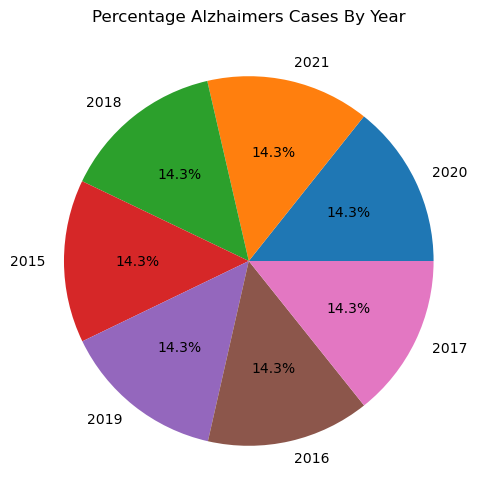

In [16]:
finalresult_df.plot(kind="pie",
                    y="_id",
                    autopct='%1.1f%%',
                    ylabel='',
                    labels=finalresult_df._id,
                    legend=False,
                    title="Percentage Alzhaimers Cases By Year",
                    figsize=(6,6))
                    
plt.savefig("Alzhaimerspercentagecasesbyyear.png")                 
plt.show()